![](https://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_schematic.png)

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [9]:
class Perceptron(object):
    def __init__(self,eta=0.01,epochs=50): # eta = 学习率 epoch是一个完整的数据集循环次数
        self.eta = eta
        self.epochs = epochs
        
    def train(self,X,y,reinitialize_weights=True):
        self._w = np.zeros(1 + X.shape[1])
        self._errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self._w[1:] += update * xi
                self._w[0] += update
                errors += int(update !=0.0)
            self._errors.append(errors)
        return self
    
    def net_input(self,X):
        
        return np.dot(X, self._w[1:]) + self._w[0] #点乘
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [6]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [12]:
X = df.iloc[0:100, [0,2]].values
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [10]:
ppn = Perceptron(epochs=10, eta=0.1)

In [13]:
ppn.train(X, y)

In [30]:
print('Weights: %s' % ppn._w)

Weights: [ 0.2        -0.05356457  0.42156282]


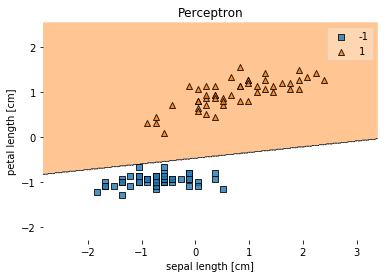

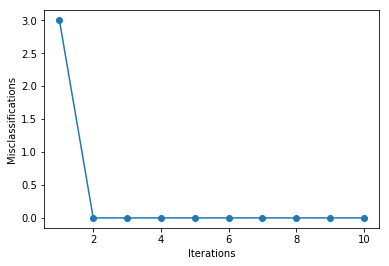

In [31]:
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn._errors)+1), ppn._errors, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

/root/anaconda3/lib/python3.6/site-packages/mlxtend/_base/_classifier.py:19: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if not np.issubdtype(y[0], int):
Iteration: 5/5 | Elapsed: 00:00:00 | ETA: 00:00:00TA: 00:00:00

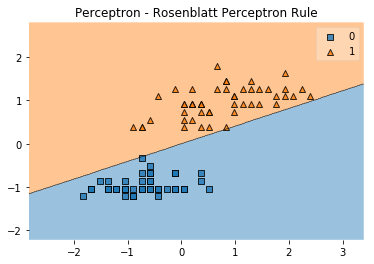

Bias & Weights: [[-0.04500809]
 [ 0.11048855]]


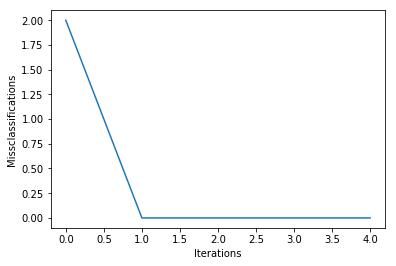

In [32]:
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import Perceptron
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width
X = X[0:100] # class 0 and class 1
y = y[0:100] # class 0 and class 1

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


# Rosenblatt Perceptron

ppn = Perceptron(epochs=5, 
                 eta=0.05, 
                 random_seed=0,
                 print_progress=3)
ppn.fit(X, y)

plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron - Rosenblatt Perceptron Rule')
plt.show()

print('Bias & Weights: %s' % ppn.w_)

plt.plot(range(len(ppn.cost_)), ppn.cost_)
plt.xlabel('Iterations')
plt.ylabel('Missclassifications')
plt.show()

In [33]:
X

array([[-0.5810659 , -1.03824799],
       [-0.89430898, -1.03824799],
       [-1.20755205, -1.03824799],
       [-1.36417359, -1.03824799],
       [-0.73768744, -1.03824799],
       [-0.11120129, -0.68329141],
       [-1.36417359, -0.8607697 ],
       [-0.73768744, -1.03824799],
       [-1.67741667, -1.03824799],
       [-0.89430898, -1.21572628],
       [-0.11120129, -1.03824799],
       [-1.05093052, -1.03824799],
       [-1.05093052, -1.21572628],
       [-1.8340382 , -1.21572628],
       [ 0.51528486, -1.03824799],
       [ 0.35866332, -0.68329141],
       [-0.11120129, -0.68329141],
       [-0.5810659 , -0.8607697 ],
       [ 0.35866332, -0.8607697 ],
       [-0.5810659 , -0.8607697 ],
       [-0.11120129, -1.03824799],
       [-0.5810659 , -0.68329141],
       [-1.36417359, -1.03824799],
       [-0.5810659 , -0.50581312],
       [-1.05093052, -1.03824799],
       [-0.73768744, -1.03824799],
       [-0.73768744, -0.68329141],
       [-0.42444437, -1.03824799],
       [-0.42444437,

In [51]:
from sklearn.linear_model import Perceptron
X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [61]:
from sklearn.model_selection import cross_val_score
ppn = Perceptron(max_iter=28)
score = cross_val_score(ppn,X,y)
print("Classifier: {0}".format(score.mean()))

Classifier: 0.8484477124183006


In [45]:
X, y = iris_data()

In [46]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [47]:
X = X[:, [0, 3]]

In [48]:
X

array([[5.1, 0.2],
       [4.9, 0.2],
       [4.7, 0.2],
       [4.6, 0.2],
       [5. , 0.2],
       [5.4, 0.4],
       [4.6, 0.3],
       [5. , 0.2],
       [4.4, 0.2],
       [4.9, 0.1],
       [5.4, 0.2],
       [4.8, 0.2],
       [4.8, 0.1],
       [4.3, 0.1],
       [5.8, 0.2],
       [5.7, 0.4],
       [5.4, 0.4],
       [5.1, 0.3],
       [5.7, 0.3],
       [5.1, 0.3],
       [5.4, 0.2],
       [5.1, 0.4],
       [4.6, 0.2],
       [5.1, 0.5],
       [4.8, 0.2],
       [5. , 0.2],
       [5. , 0.4],
       [5.2, 0.2],
       [5.2, 0.2],
       [4.7, 0.2],
       [4.8, 0.2],
       [5.4, 0.4],
       [5.2, 0.1],
       [5.5, 0.2],
       [4.9, 0.1],
       [5. , 0.2],
       [5.5, 0.2],
       [4.9, 0.1],
       [4.4, 0.2],
       [5.1, 0.2],
       [5. , 0.3],
       [4.5, 0.3],
       [4.4, 0.2],
       [5. , 0.6],
       [5.1, 0.4],
       [4.8, 0.3],
       [5.1, 0.2],
       [4.6, 0.2],
       [5.3, 0.2],
       [5. , 0.2],
       [7. , 1.4],
       [6.4, 1.5],
       [6.9,